In [1]:
!pip install pandas-datareader


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf

In [3]:
yf.pdr_override()

#start_date = "2020-01-01"
#end_date = "2020-12-31"
#ticker = 'TSLA'
df_tesla = pdr.get_data_yahoo('TSLA')
df_tesla.head(5)


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


<AxesSubplot:xlabel='Date'>

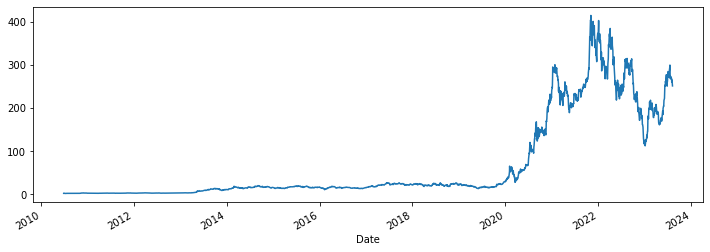

In [4]:
df_tesla['High'].plot(figsize=(12,4))

<AxesSubplot:xlabel='Date'>

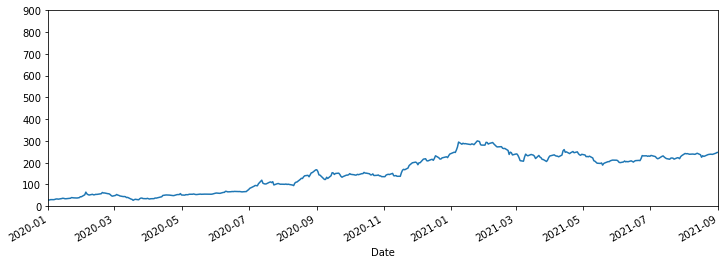

In [5]:

## xlimit and ylimit
df_tesla['High'].plot(xlim=['2020-01-01','2021-09-01'],ylim=[0,900],figsize=(12,4))

In [6]:
df_tesla.index


DatetimeIndex(['2010-06-29', '2010-06-30', '2010-07-01', '2010-07-02',
               '2010-07-06', '2010-07-07', '2010-07-08', '2010-07-09',
               '2010-07-12', '2010-07-13',
               ...
               '2023-07-26', '2023-07-27', '2023-07-28', '2023-07-31',
               '2023-08-01', '2023-08-02', '2023-08-03', '2023-08-04',
               '2023-08-07', '2023-08-08'],
              dtype='datetime64[ns]', name='Date', length=3300, freq=None)

In [7]:
index=df_tesla.loc['2020-01-01':'2021-09-01'].index
share_open=df_tesla.loc['2020-01-01':'2021-09-01']['Open']

In [8]:
share_open

Date
2020-01-02     28.299999
2020-01-03     29.366667
2020-01-06     29.364668
2020-01-07     30.760000
2020-01-08     31.580000
                 ...    
2021-08-26    236.103333
2021-08-27    235.000000
2021-08-30    238.240005
2021-08-31    244.333328
2021-09-01    244.693329
Name: Open, Length: 421, dtype: float64

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

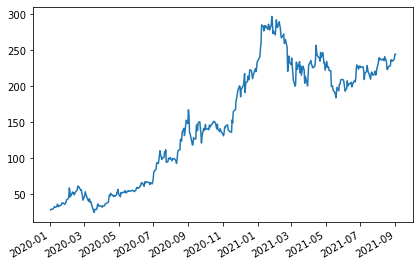

In [10]:
figure,axis=plt.subplots()
plt.tight_layout()
#Preventing overlapping
figure.autofmt_xdate()
axis.plot(index,share_open)

In [11]:
## Datetime index

In [12]:
df_tesla=df_tesla.reset_index()

In [13]:
pd.to_datetime(df_tesla['Date'])

0      2010-06-29
1      2010-06-30
2      2010-07-01
3      2010-07-02
4      2010-07-06
          ...    
3295   2023-08-02
3296   2023-08-03
3297   2023-08-04
3298   2023-08-07
3299   2023-08-08
Name: Date, Length: 3300, dtype: datetime64[ns]

In [14]:
df_tesla=df_tesla.set_index('Date', drop=True)

In [15]:
df_tesla

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...
2023-08-02,255.570007,259.519989,250.490005,254.110001,254.110001,101752900
2023-08-03,252.039993,260.489990,252.000000,259.320007,259.320007,97569100
2023-08-04,260.970001,264.769989,253.110001,253.860001,253.860001,99242600


In [16]:
## datetime

from datetime import datetime


In [17]:
datetime(2021,11,21) 

datetime.datetime(2021, 11, 21, 0, 0)

In [18]:
datetime.now()

datetime.datetime(2023, 8, 8, 23, 4, 4, 27504)

In [19]:
def add_num(num1,num2):
    return num1+num2;

In [20]:
num1=20
num2=30
start_time=datetime.now()
for i in [1,2,3,4,5,6]:
    
    add_num(num1,num2)
end_time=datetime.now()
print(end_time-start_time)

0:00:00


In [21]:
date=datetime(2021,11,21)

In [22]:
date

datetime.datetime(2021, 11, 21, 0, 0)

date.date()

In [23]:
date.day

21

In [24]:
date.weekday()

6

In [25]:
date.year

2021

## Time Resampling

In [26]:
##min share price for each year

df_tesla.resample(rule='A').min()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-12-31,1.076000,1.108667,0.998667,1.053333,1.053333,1777500
2011-12-31,1.452000,1.484667,1.407333,1.455333,1.455333,3594000
2012-12-31,1.774667,1.790000,1.509333,1.519333,1.519333,5473500
2013-12-31,2.205333,2.225333,2.140667,2.194000,2.194000,6603000
2014-12-31,9.366667,9.800000,9.111333,9.289333,9.289333,19983000
2015-12-31,12.388667,12.619333,12.093333,12.333333,12.333333,10620000
2016-12-31,9.488000,10.331333,9.403333,9.578000,9.578000,24892500
2017-12-31,14.316667,14.688667,14.064000,14.466000,14.466000,32800500
2018-12-31,16.851999,17.355333,16.306000,16.704000,16.704000,46210500


<AxesSubplot:xlabel='Date'>

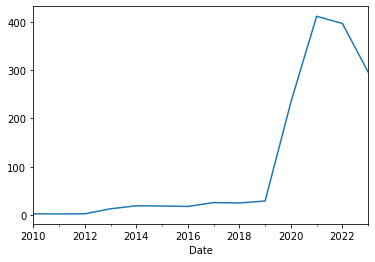

In [27]:
## max price for all year
df_tesla.resample(rule='A').max()['Open'].plot()

<AxesSubplot:xlabel='Date'>

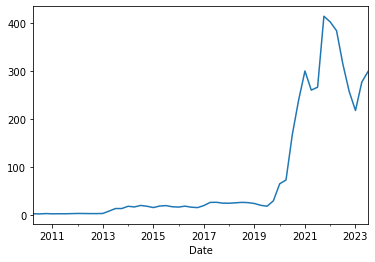

In [28]:
## quarterly

df_tesla.resample(rule='QS').max()['High'].plot()

In [29]:
## Business year got over End Frequency
df_tesla.resample(rule='BA').max()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-12-31,2.391333,2.428000,2.316667,2.364667,2.364667,281494500
2011-12-30,2.308667,2.333333,2.268667,2.329333,2.329333,172767000
2012-12-31,2.546000,2.663333,2.474000,2.534000,2.534000,85206000
2013-12-31,12.930667,12.966667,12.558000,12.891333,12.891333,557458500
2014-12-31,19.177999,19.427999,18.693333,19.069332,19.069332,490225500
2015-12-31,18.680000,19.110001,18.420000,18.817333,18.817333,234744000
2016-12-30,17.763332,17.955999,16.967333,17.694668,17.694668,356136000
2017-12-29,25.779333,25.974001,25.290001,25.666668,25.666668,296871000
2018-12-31,25.000000,25.830667,24.474667,25.304667,25.304667,504745500


In [30]:
df_tesla.resample(rule='BQS').max()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-04-01,1.719333,2.028000,1.553333,1.592667,1.592667,281494500
2010-07-01,1.666667,1.728000,1.408667,1.465333,1.465333,123282000
2010-10-01,2.391333,2.428000,2.316667,2.364667,2.364667,139528500
2011-01-03,1.906000,1.914000,1.870000,1.896667,1.896667,172767000
2011-04-01,2.006667,2.100000,1.970000,2.009333,2.009333,93138000
2011-07-01,1.992667,2.029333,1.934000,1.982000,1.982000,45967500
2011-10-03,2.308667,2.333333,2.268667,2.329333,2.329333,58024500
2012-01-02,2.546000,2.663333,2.474000,2.529333,2.529333,82506000
2012-04-02,2.488667,2.564667,2.444667,2.534000,2.534000,83344500


<AxesSubplot:xlabel='Date'>

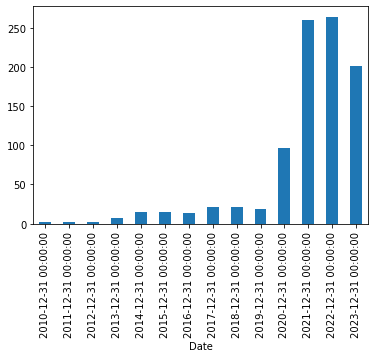

In [31]:
## plotting

df_tesla['Open'].resample(rule='A').mean().plot(kind='bar')

<AxesSubplot:xlabel='Date'>

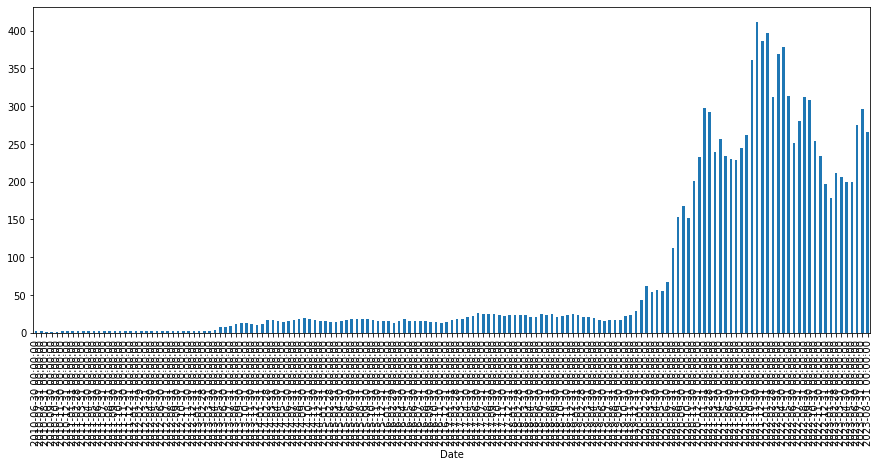

In [32]:
df_tesla['Open'].resample(rule='M').max().plot(kind='bar',figsize=(15,6))

In [33]:
## Rolling and expanding

df_tesla['High'].rolling(10).mean().head(20)

Date
2010-06-29         NaN
2010-06-30         NaN
2010-07-01         NaN
2010-07-02         NaN
2010-07-06         NaN
2010-07-07         NaN
2010-07-08         NaN
2010-07-09         NaN
2010-07-12         NaN
2010-07-13    1.421333
2010-07-14    1.389000
2010-07-15    1.329533
2010-07-16    1.298733
2010-07-19    1.293067
2010-07-20    1.305400
2010-07-21    1.333867
2010-07-22    1.358733
2010-07-23    1.383133
2010-07-26    1.406000
2010-07-27    1.422933
Name: High, dtype: float64

In [34]:
df_tesla.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [35]:
df_tesla['Open:30 days rolling']=df_tesla['Open'].rolling(30).mean()